In [26]:
from simulation import *
from core_plugins.plot_curves import *
from math import *
import numpy as np
meterial = meterial_s
print_meterial = print_meterial_s

glass_nk = 1.5 + 0j
air_nk   = 1 + 0j

glass = meterial()
glass.nk = glass_nk
glass.depth = 0

air = meterial()
air.nk = air_nk
air.depth = 0

def test_TMM(meterials, N = 90, wavelength = 500):
    print_meterial(meterials)
    
    step = 0.5 * pi / (N - 1) if N >= 2 else 0
    eps = 1e-4
    rs_power = list()
    ts_power = list()
    rp_power = list()
    tp_power = list()
    rs_real_part = list()
    ts_real_part = list()
    rp_real_part = list()
    tp_real_part = list()

    phase_rs = list()
    phase_rp = list()
    
    for i in range(N):
        crao = i * step + 0j
        dir = TMM_propagate_direction(meterials, crao)
        tmm = TMM_interface_transfer_matrix_with_thickness_s(meterials, dir, wavelength)
        current_tmm = tmm[-1]
        # print("s", current_tmm)
        Rs, Ts = TMM_get_r_t_power_from_tmm_s(current_tmm, meterials[0].nk, dir[0], meterials[-1].nk, dir[-1])
        assert(TMM_check_power_refrection_transmission_s(Rs, Ts, eps))
        rs_power.append(Rs)
        ts_power.append(Ts)

        rs, ts = TMM_get_r_t_from_tmm(current_tmm)
        # assert(TMM_check_refrection_transmission_s(rs, ts, meterials[0].nk, meterials[1].nk, eps))
        rs_real_part.append(rs.real)
        ts_real_part.append(ts.real)
        
        tmm = TMM_interface_transfer_matrix_with_thickness_p(meterials, dir, wavelength)
        current_tmm = tmm[-1]
        # print("p",current_tmm)
        Rp, Tp = TMM_get_r_t_power_from_tmm_p(current_tmm, meterials[0].nk, dir[0], meterials[-1].nk, dir[-1])
        assert(TMM_check_power_refrection_transmission_p(Rp, Tp, eps))
        rp_power.append(Rp)
        tp_power.append(Tp)

        rp, tp = TMM_get_r_t_from_tmm(current_tmm)
        # assert(TMM_check_refrection_transmission_p(rp, tp, meterials[0].nk, meterials[1].nk, eps))
        rp_real_part.append(rp.real)
        tp_real_part.append(tp.real)

        phase_rs.append(np.abs(np.angle(rs, deg=True)))
        phase_rp.append(np.abs(np.angle(rp, deg=True)))

    unpolarized_reflection_power = [(a+b)/2 for a,b in zip(rp_power, rs_power)]
    unpolarized_transimition_power = [(a+b)/2 for a,b in zip(tp_power, ts_power)]

    return {
        "meterials": meterials,
        "rs_power" : rs_power,
        "ts_power" : ts_power,
        "rp_power" : rp_power,
        "tp_power" : tp_power,
        "rs" : rs_real_part,
        "ts" : ts_real_part,
        "rp" : rp_real_part,
        "tp" : tp_real_part,
        "unpolarized_reflection_power" : unpolarized_reflection_power,
        "unpolarized_transimition_power" : unpolarized_transimition_power,
        "phase_rs": phase_rs,
        "phase_rp": phase_rp,
    }


def get_nk(material_name, wavelength_nm):
    from refractiveindex import RefractiveIndexMaterial
    SiO2 = RefractiveIndexMaterial(shelf='main', book=material_name, page='Hass')
    print(SiO2.get_epsilon(wavelength_nm),
    SiO2.get_refractive_index(wavelength_nm),
    SiO2.get_extinction_coefficient(wavelength_nm))


print("* test multilayer film")
glass.depth = 100
result_glass_to_air = test_TMM([air, glass, air])


* test multilayer film
thickness  absorption coefficient  refractive index  
--------------------------------------------------------
0          0                       1                 
100        0                       1.5               
0          0                       1                 


* power of reflection & transimition


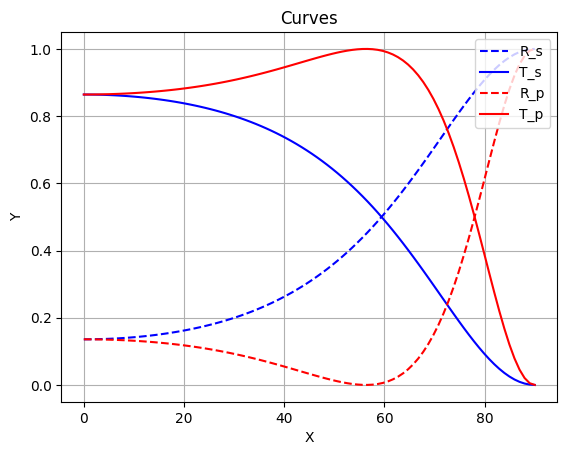

* reflection & transimition


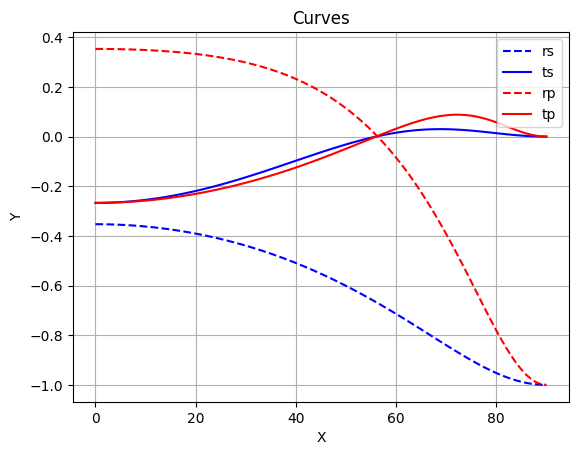

In [27]:
def plot_result(result, with_unpolarized = False):
    N = len(result["rs_power"])
    if N < 2:
        from pprint import pprint
        pprint(result)
        return
    
    curves = [result["rs_power"], result["ts_power"], 
              result["rp_power"], result["tp_power"],
    ]
    if with_unpolarized:
        for r in ["unpolarized_reflection_power", "unpolarized_transimition_power"]:
            curves.append(result[r])

    start_x = [0 for i in range(len(curves))]
    step_x  = [90.0/(N - 1) for i in range(len(curves))]
    legends = ["R_s", "T_s", "R_p", "T_p", "R_unpolarized", "T_unpolarized"]
    style   = ["b--", "b-", "r--", "r-", "c.", "y."]

    print("* power of reflection & transimition")
    plot_curves(curves, start_x, step_x, legends, style)
    
    print("* reflection & transimition")
    curves = [
        result["rs"], result["ts"],
        result["rp"], result["tp"],
    ]
    start_x = [0 for i in range(len(curves))]
    step_x  = [90.0/(N - 1) for i in range(len(curves))]
    legends = ["rs", "ts", "rp", "tp"]
    style   = ["b--", "b-", "r--", "r-"]
    plot_curves(curves, start_x, step_x, legends, style)
plot_result(result_glass_to_air, with_unpolarized=False)